<a href="https://colab.research.google.com/github/RajBharti25/Image-whittening-for-deep-leaning-application/blob/master/Assignment_16EC10044_ipybn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#RAJ BHARTI      |       16EC10044


#**Image Whitening**

Before we start using our data to train a Deep Neural Network model, It is standard practice to preprocess the data so that we can get a better result of them.


1.   **Why is data preprocessing required?**
       As we are working on real world data, Our Raw data can have missing or inconsistent values as well as present a lot of redundant information.

Your sets will surely have missing and noisy data. That’s because the data gathering process isn’t perfect, so you’ll have many irrelevant and missing parts here and there. The method you should use to take care of this issue is called data cleaning.


       Here is the list of some of the sortcoming in the data that we try to overcome using the preprocessing.


*   Missing data 

    you can also see this as inaccurate data since the information that isn’t there creates gaps that might be relevant to the final analysis. Missing data often appears when there’s a problem in the collection phase, such as a glitch that caused a system’s downtime, mistakes in data entry, or issues with biometrics use, among others.
*   Noisy data

    this group encompasses erroneous data and outliers that you can find in the data set but that is just meaningless information. Here you can see noise made of human mistakes, rare exceptions, mislabels, and other issues during data gathering.
*   Inconsistent data

    inconsistencies happen when you keep files with similar data in different formats and files. Duplicates in different formats, mistakes in codes of names, or the absence of data constraints often lead to inconsistent data, that introduces deviations that you have to deal with before analysis.


These types of shortcoming in our raw data can cause a lot of damage to our analysis and often leads to adding noise in our output along with wrong result if not taken care of beforehand.

2.  **What are different data preprocessing techniques?**  
There are three common forms of data preprocessing a data matrix X, where we will assume that X is of size [N x D] (N is the number of data, D is their dimensionality).


*   Mean subtraction

    It is the most common form of preprocessing. It involves subtracting the mean across every individual feature in the data, and has the geometric interpretation of centering the cloud of data around the origin along every dimension. In numpy, this operation would be implemented as:
```
X -= np.mean(X, axis = 0)
```
*   Normalization

    It refers to normalizing the data dimensions so that they are of approximately the same scale. There are two common ways of achieving this normalization. One is to divide each dimension by its standard deviation, once it has been zero-centered: (X /= np.std(X, axis = 0)). Another form of this preprocessing normalizes each dimension so that the min and max along the dimension is -1 and 1 respectively.
```
X /= np.std(X, axis = 0))
```
*   PCA and Whitening 
    
    It is another form of preprocessing. In this process, the data is first centered as described above. Then, we can compute the covariance matrix that tells us about the correlation structure in the data, we will see its implementation in the next section









we will be using The training set of the CIFAR10 dataset contains 50000 images. The shape of X_train is (50000, 32, 32, 3). Each image is 32px by 32px and each pixel contains 3 dimensions (R, G, B). Each value is the brightness of the corresponding color between 0 and 255.

In [7]:
from keras.datasets import cifar10

(X_train, y_train), (X_test, y_test) = cifar10.load_data()

X_train.shape

(50000, 32, 32, 3)

In [0]:
import numpy as np

In [8]:
#Lets select only a small number of image so that we can run it faster
X=X_train[20000:21000]
X.shape

(1000, 32, 32, 3)

In [9]:
# We will flatten the matrix such that each image is represented by shape=(1,w*h*c)
X = X.reshape(X.shape[0], X.shape[1]*X.shape[2]*X.shape[3])
X.shape

(1000, 3072)

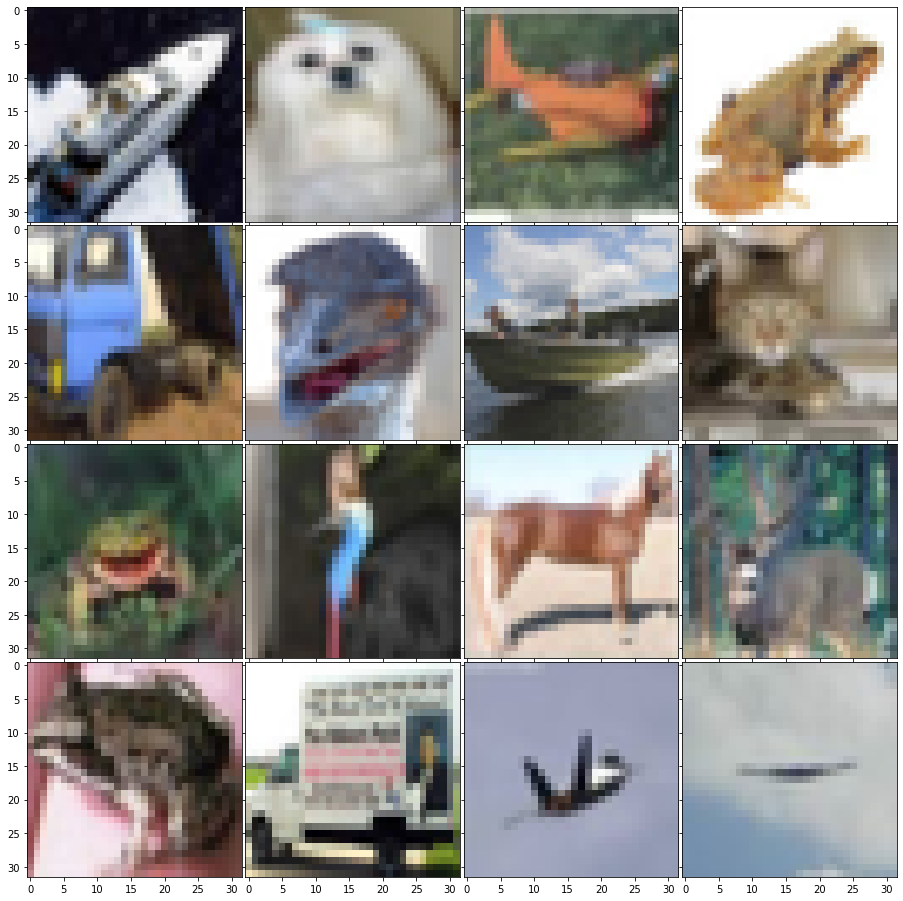

In [23]:
# lets print some of the images using plt.imshow
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import ImageGrid
fig = plt.figure(1, figsize=(16, 16))
grid = ImageGrid(fig, 111, nrows_ncols=(4, 4), axes_pad=0.05)
for i in range(16):
  ax = grid[i]
  ax.imshow(X[i,:].reshape(32,32,3))

We can now implement the whitening of the images
steps are as follow


*   The first step is to rescale the images to obtain the range [0, 1] by dividing by 255 (the maximum value of the pixels).
*   Subtract the mean from all image.We will be implementing per-pixel mean subtraction from our 1000 images


*   calculate the covariance matrix of the zero-centered data
*   calculate the singular values and vectors of the covariance matrix and use them to rotate our dataset.





In [24]:
#step1 
X_norm = X / 255.
print('X_norm.max():',X_norm.max())
print('X_norm.min():',X_norm.min())

X_norm.max(): 1.0
X_norm.min(): 0.0


In [0]:
#step2
X_norm = X_norm - X_norm.mean(axis=0)

In [29]:
#step3
cov = np.cov(X_norm, rowvar=False)
cov.shape

(3072, 3072)

In [30]:
#step 3
U,S,V = np.linalg.svd(cov)
'''
with U the left singular vectors, and S the singular values of the covariance of the initial normalized dataset 
of images and X the normalized dataset. ϵ is an hyper-parameter called the whitening coefficient. 
diag(a) corresponds to a matrix with the vector a as a diagonal and 0 in all other cells.
'''
print('U.shape:',U.shape)
print('S.shape:',S.shape)
print('V.shape:',V.shape)

U.shape: (3072, 3072)
S.shape: (3072,)
V.shape: (3072, 3072)


In [34]:
#S is a vector containing 3072 elements (the singular values). diag(S) will thus be of shape (3072, 3072) with S as the diagonal
print(np.diag(S))
print('\nshape:', np.diag(S).shape)

[[5.90341604e+01 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 2.11131531e+01 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 1.22019698e+01 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 ...
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 5.59227377e-15
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  3.03665321e-15 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 2.63279755e-15]]

shape: (3072, 3072)


In [35]:
epsilon = 0.1
X_ZCA = U.dot(np.diag(1.0/np.sqrt(S + epsilon))).dot(U.T).dot(X_norm.T).T
#Let's rescale the images:

X_ZCA_rescaled = (X_ZCA - X_ZCA.min()) / (X_ZCA.max() - X_ZCA.min())
print('min:', X_ZCA_rescaled.min())
print('max:', X_ZCA_rescaled.max())

min: 0.0
max: 1.0


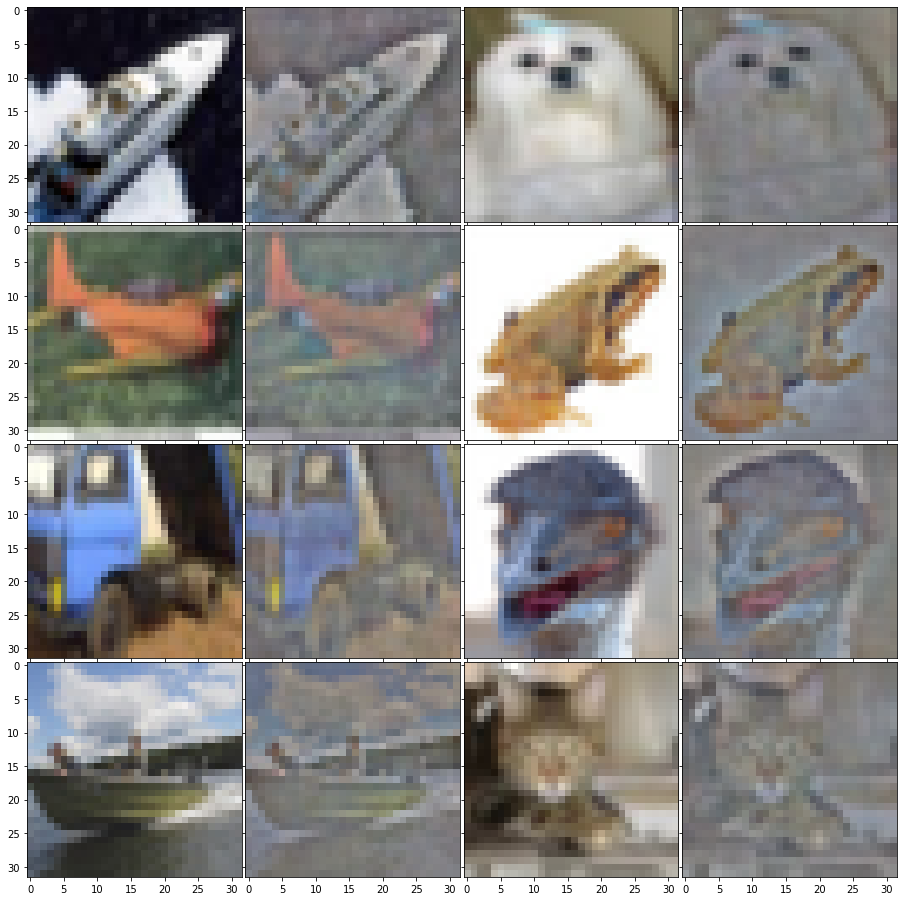

In [43]:
fig = plt.figure(1, figsize=(16, 16))
grid = ImageGrid(fig, 111, nrows_ncols=(4, 4), axes_pad=0.05)
for i in range(8):
  ax = grid[2*i]
  ax.imshow(X[i,:].reshape(32,32,3))
  ax=grid[2*i+1]
  ax.imshow(X_ZCA_rescaled[i,:].reshape(32,32,3))

#...................................**THANKYOU**.............................